## Data Processing Steps

### 1. Data Loading and Exploration

- Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
import seaborn as sns


sns.set_style("whitegrid")

plt.rcParams.update({
    'font.family': 'Times New Roman',  #'Arial',  # or 'Helvetica', 'Times New Roman'
    'font.size': 12,  # General font size
    'axes.titlesize': 14,  # Font size for titles
    'axes.labelsize': 12,  # Font size for axis labels
    'xtick.labelsize': 11,  # Font size for x-tick labels
    'ytick.labelsize': 11,   # Font size for y-tick labels
    'legend.fontsize': 11,   # Font size for legend
    'legend.title_fontsize': 11   # Font size for legend title
})


- Load and preview dataset:

In [2]:
df = pd.read_csv('data/claims_dummy_data.csv')
df.head()

,Claim ID,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Previous_Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,167647,Male,22,1,7,1,< 1 Year,No,2630,152,0
1,17163,Male,42,1,28,0,1-2 Year,Yes,43327,26,0
2,32023,Female,66,1,33,0,1-2 Year,Yes,35841,124,0
3,87447,Female,22,1,33,0,< 1 Year,No,27645,152,0
4,501933,Male,28,1,46,1,< 1 Year,No,29023,152,0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Claim ID                 382154 non-null  int64 
 1   Gender                   382154 non-null  object
 2   Age                      382154 non-null  int64 
 3   Driving_License          382154 non-null  int64 
 4   Region_Code              382154 non-null  int64 
 5   Previously_Insured       382154 non-null  int64 
 6   Vehicle_Age              382154 non-null  object
 7   Previous_Vehicle_Damage  382154 non-null  object
 8   Annual_Premium           382154 non-null  int64 
 9   Policy_Sales_Channel     382154 non-null  int64 
 10  Response                 382154 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 32.1+ MB


,Claim ID,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,1.000000


- Check for missing values:

In [4]:
df.isnull().sum()

Claim ID                   0
Gender                     0
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Previous_Vehicle_Damage    0
Annual_Premium             0
Policy_Sales_Channel       0
Response                   0
dtype: int64

### 2. Exploratory Data Analysis (EDA)

- Categorical feature distribution against target (Response):

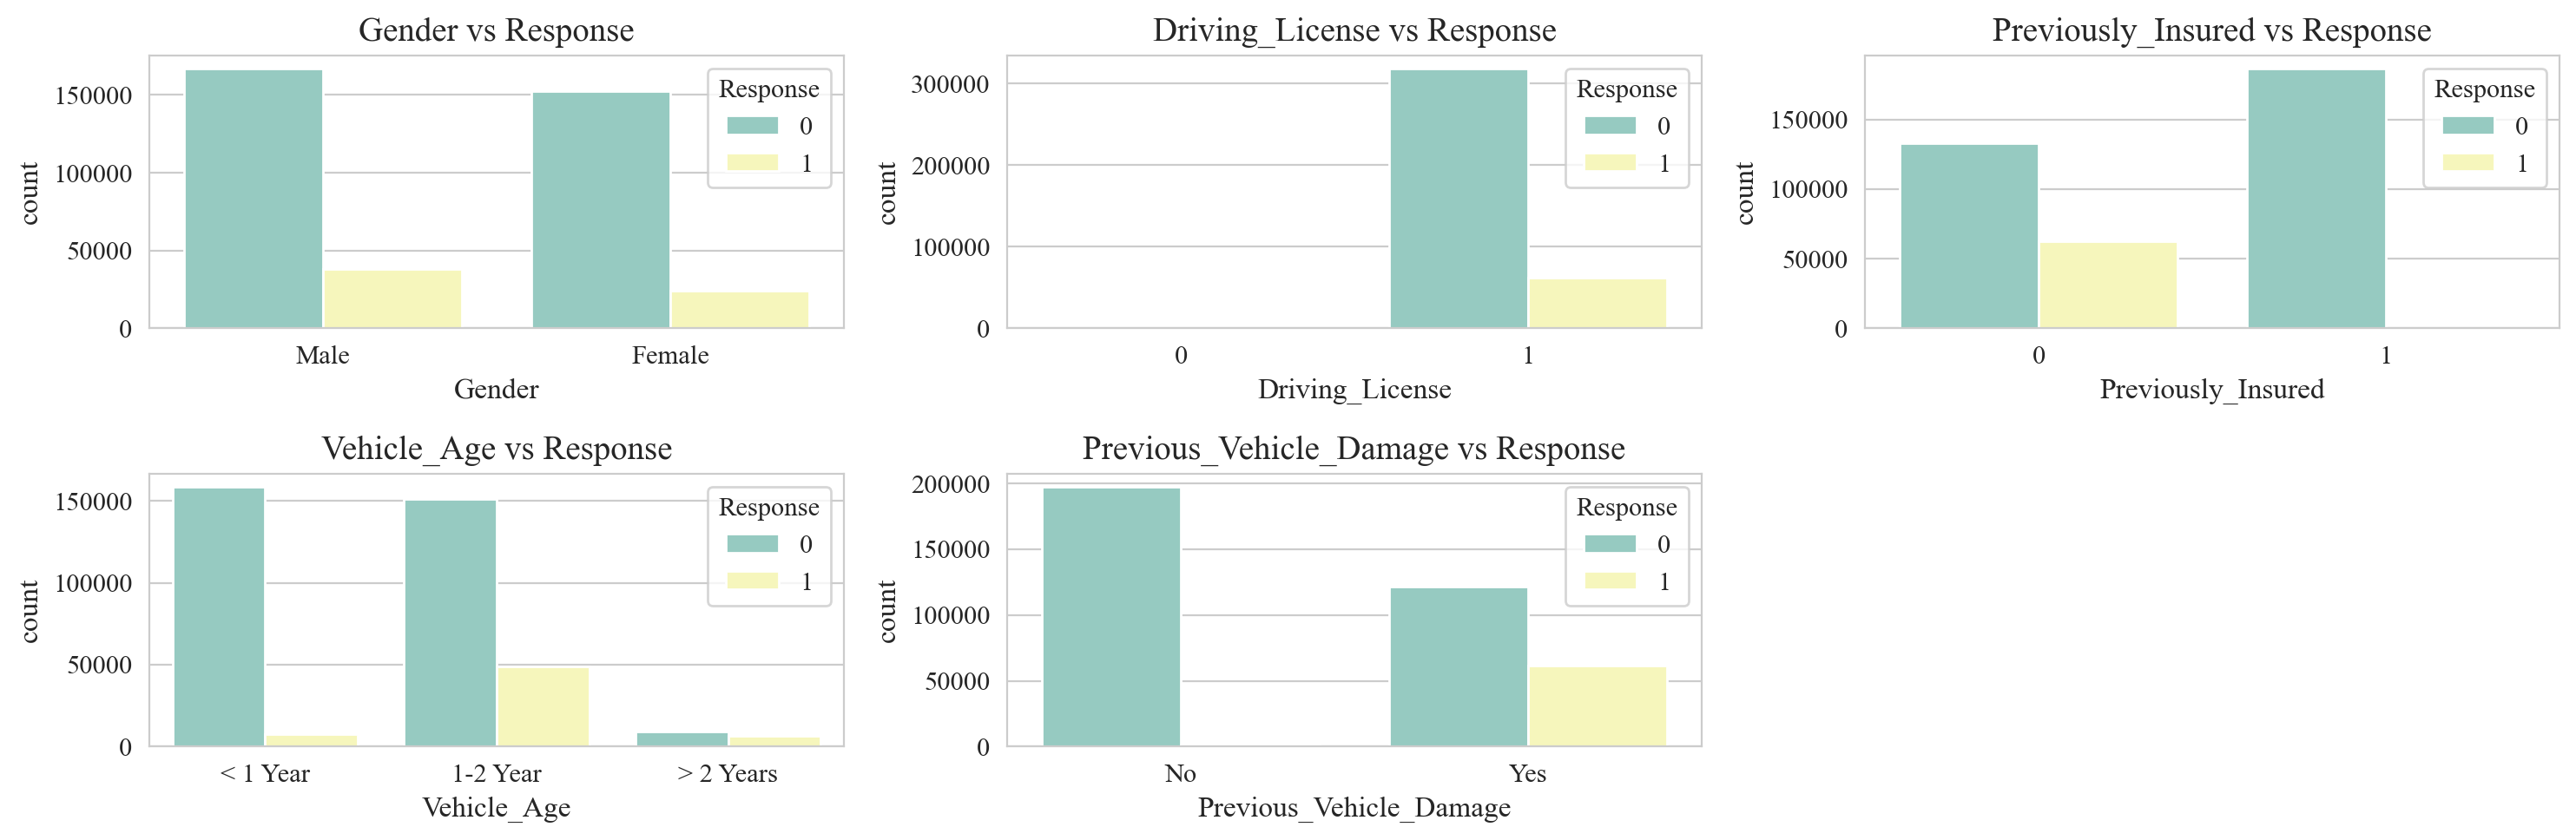

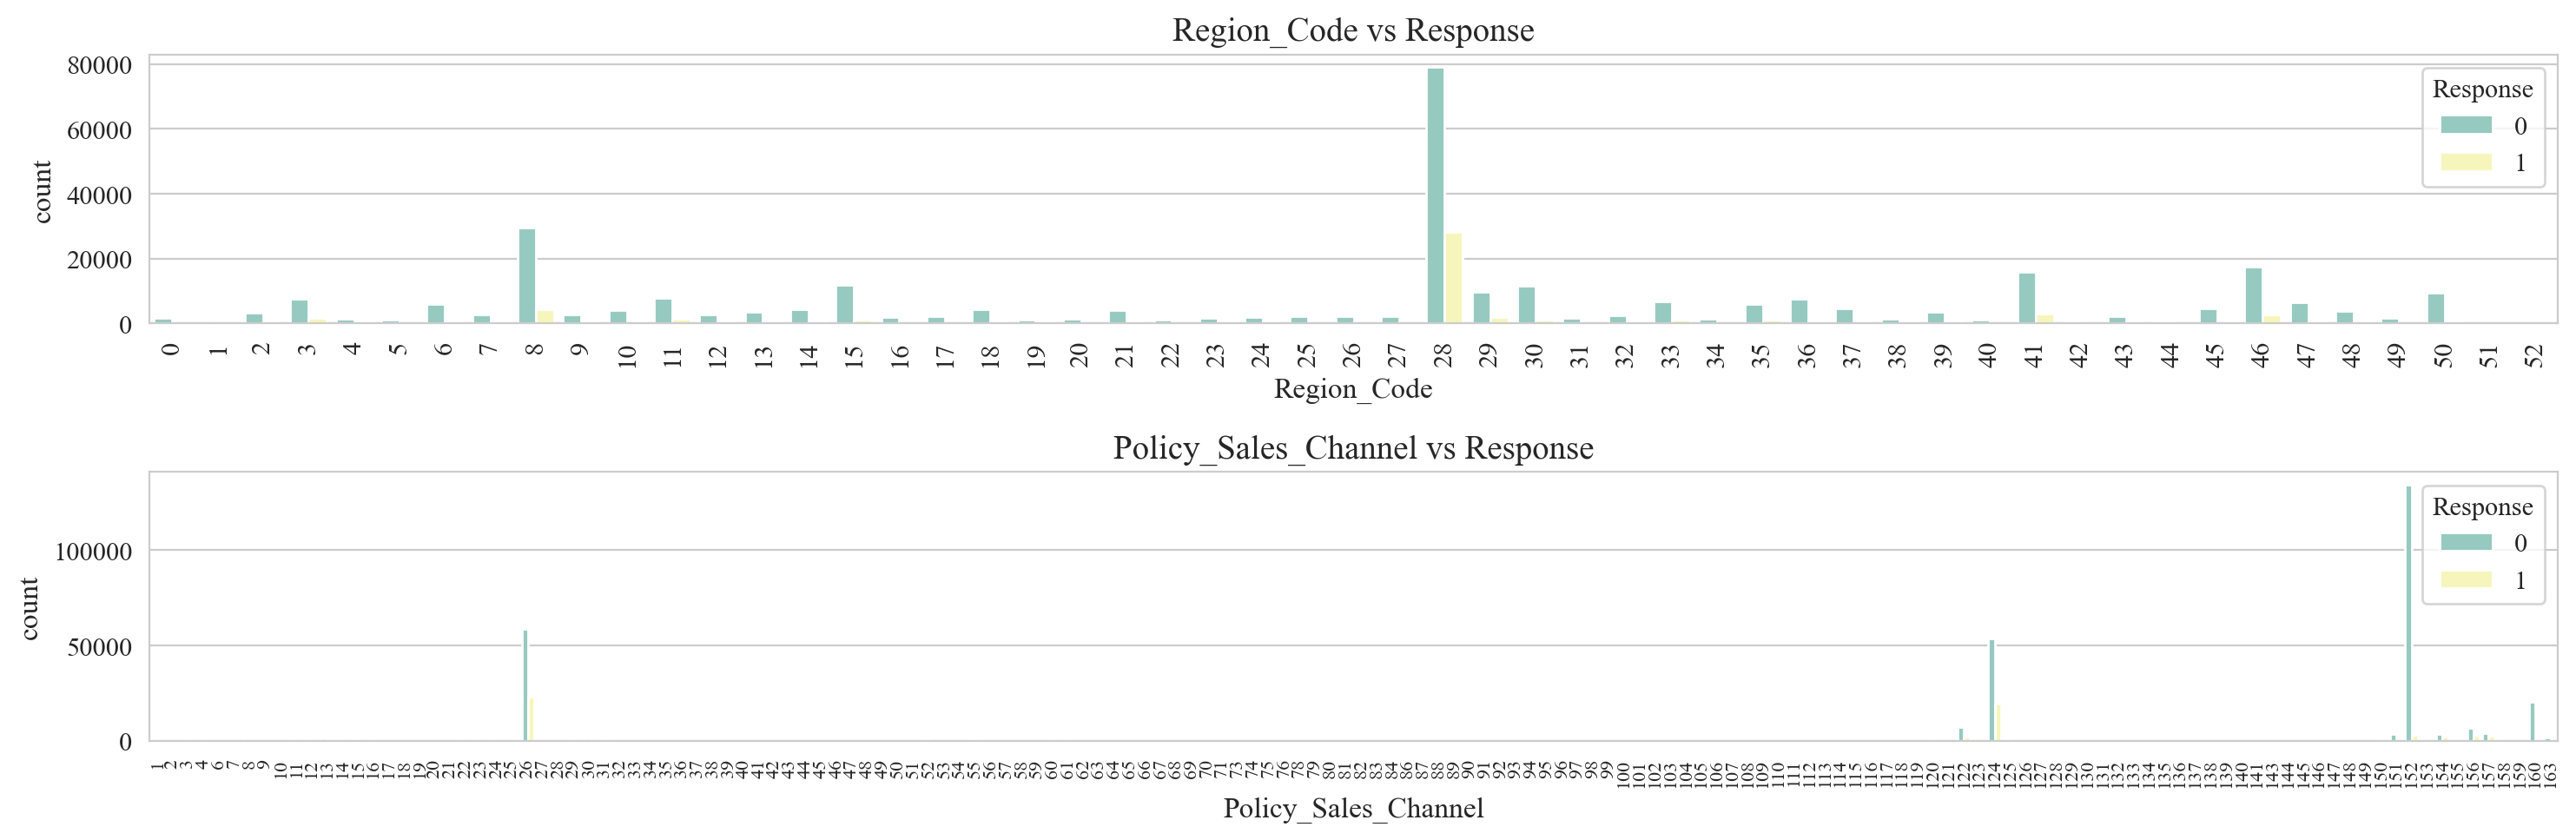

In [5]:
# Plot the relationship between categorical features and the target variable

def countplot_categorical(df):
    plt.figure(figsize=(15, 5), dpi=200)
    for i, col in enumerate(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Previous_Vehicle_Damage']): 
        plt.subplot(2, 3, i+1)
        sns.countplot(x=col, hue='Response', data=df, palette='Set3')
        plt.title(f'{col} vs Response')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(15, 5), dpi=200)
    default_labelsize = plt.rcParams['xtick.labelsize']
    for i, col in enumerate(['Region_Code', 'Policy_Sales_Channel']):
        plt.rcParams.update({'xtick.labelsize': 8 if col == 'Policy_Sales_Channel' else default_labelsize})
        plt.subplot(2, 1, i+1)
        sns.countplot(x=col, hue='Response', data=df, palette='Set3')
        plt.title(f'{col} vs Response')
        plt.xticks(rotation=90)
    plt.rcParams.update({'xtick.labelsize': default_labelsize})
    plt.tight_layout()
    plt.show()

countplot_categorical(df)

- Numerical feature distribution against target (Response):

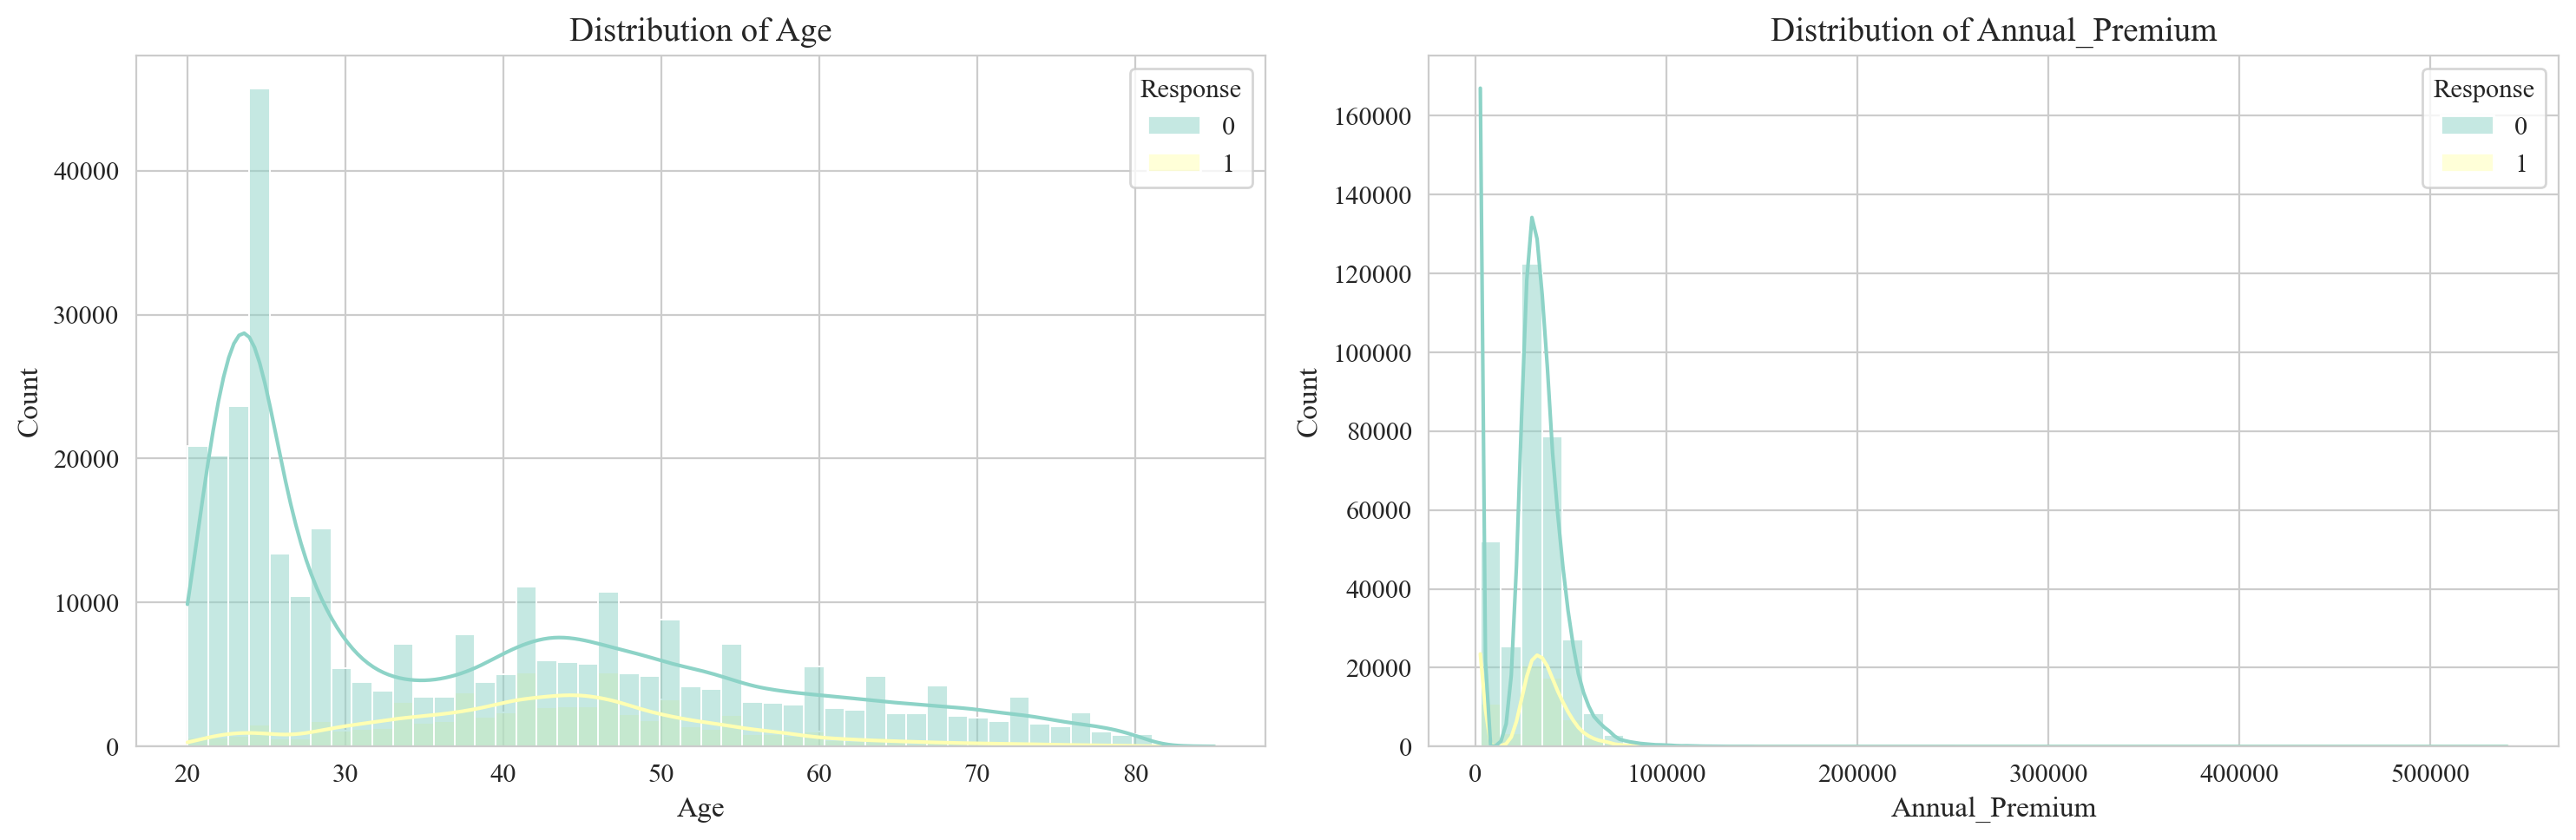

In [6]:
def histplot_numerical(df):
    plt.figure(figsize=(15, 5), dpi=200)
    for i, col in enumerate(['Age', 'Annual_Premium']):
        plt.subplot(1, 2, i+1)
        sns.histplot(x=col, hue='Response', data=df, bins=50, palette='Set3', kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    
histplot_numerical(df)

### 3. Data Preprocessing & Feature Engineering

- Drop Irelevant Columns:

In [7]:
# df = df.drop(['Claim ID'], axis=1)

#### 3.1. Categorical Features
- Encode categorical columns:

In [8]:
from data_util import _encode_categoricals

df = _encode_categoricals(df)

df.head()

,Claim ID,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Previous_Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,167647,1,22,1,7,1,0,0,2630,152,0
1,17163,1,42,1,28,0,1,1,43327,26,0
2,32023,0,66,1,33,0,1,1,35841,124,0
3,87447,0,22,1,33,0,0,0,27645,152,0
4,501933,1,28,1,46,1,0,0,29023,152,0


- Correlation Matrix:

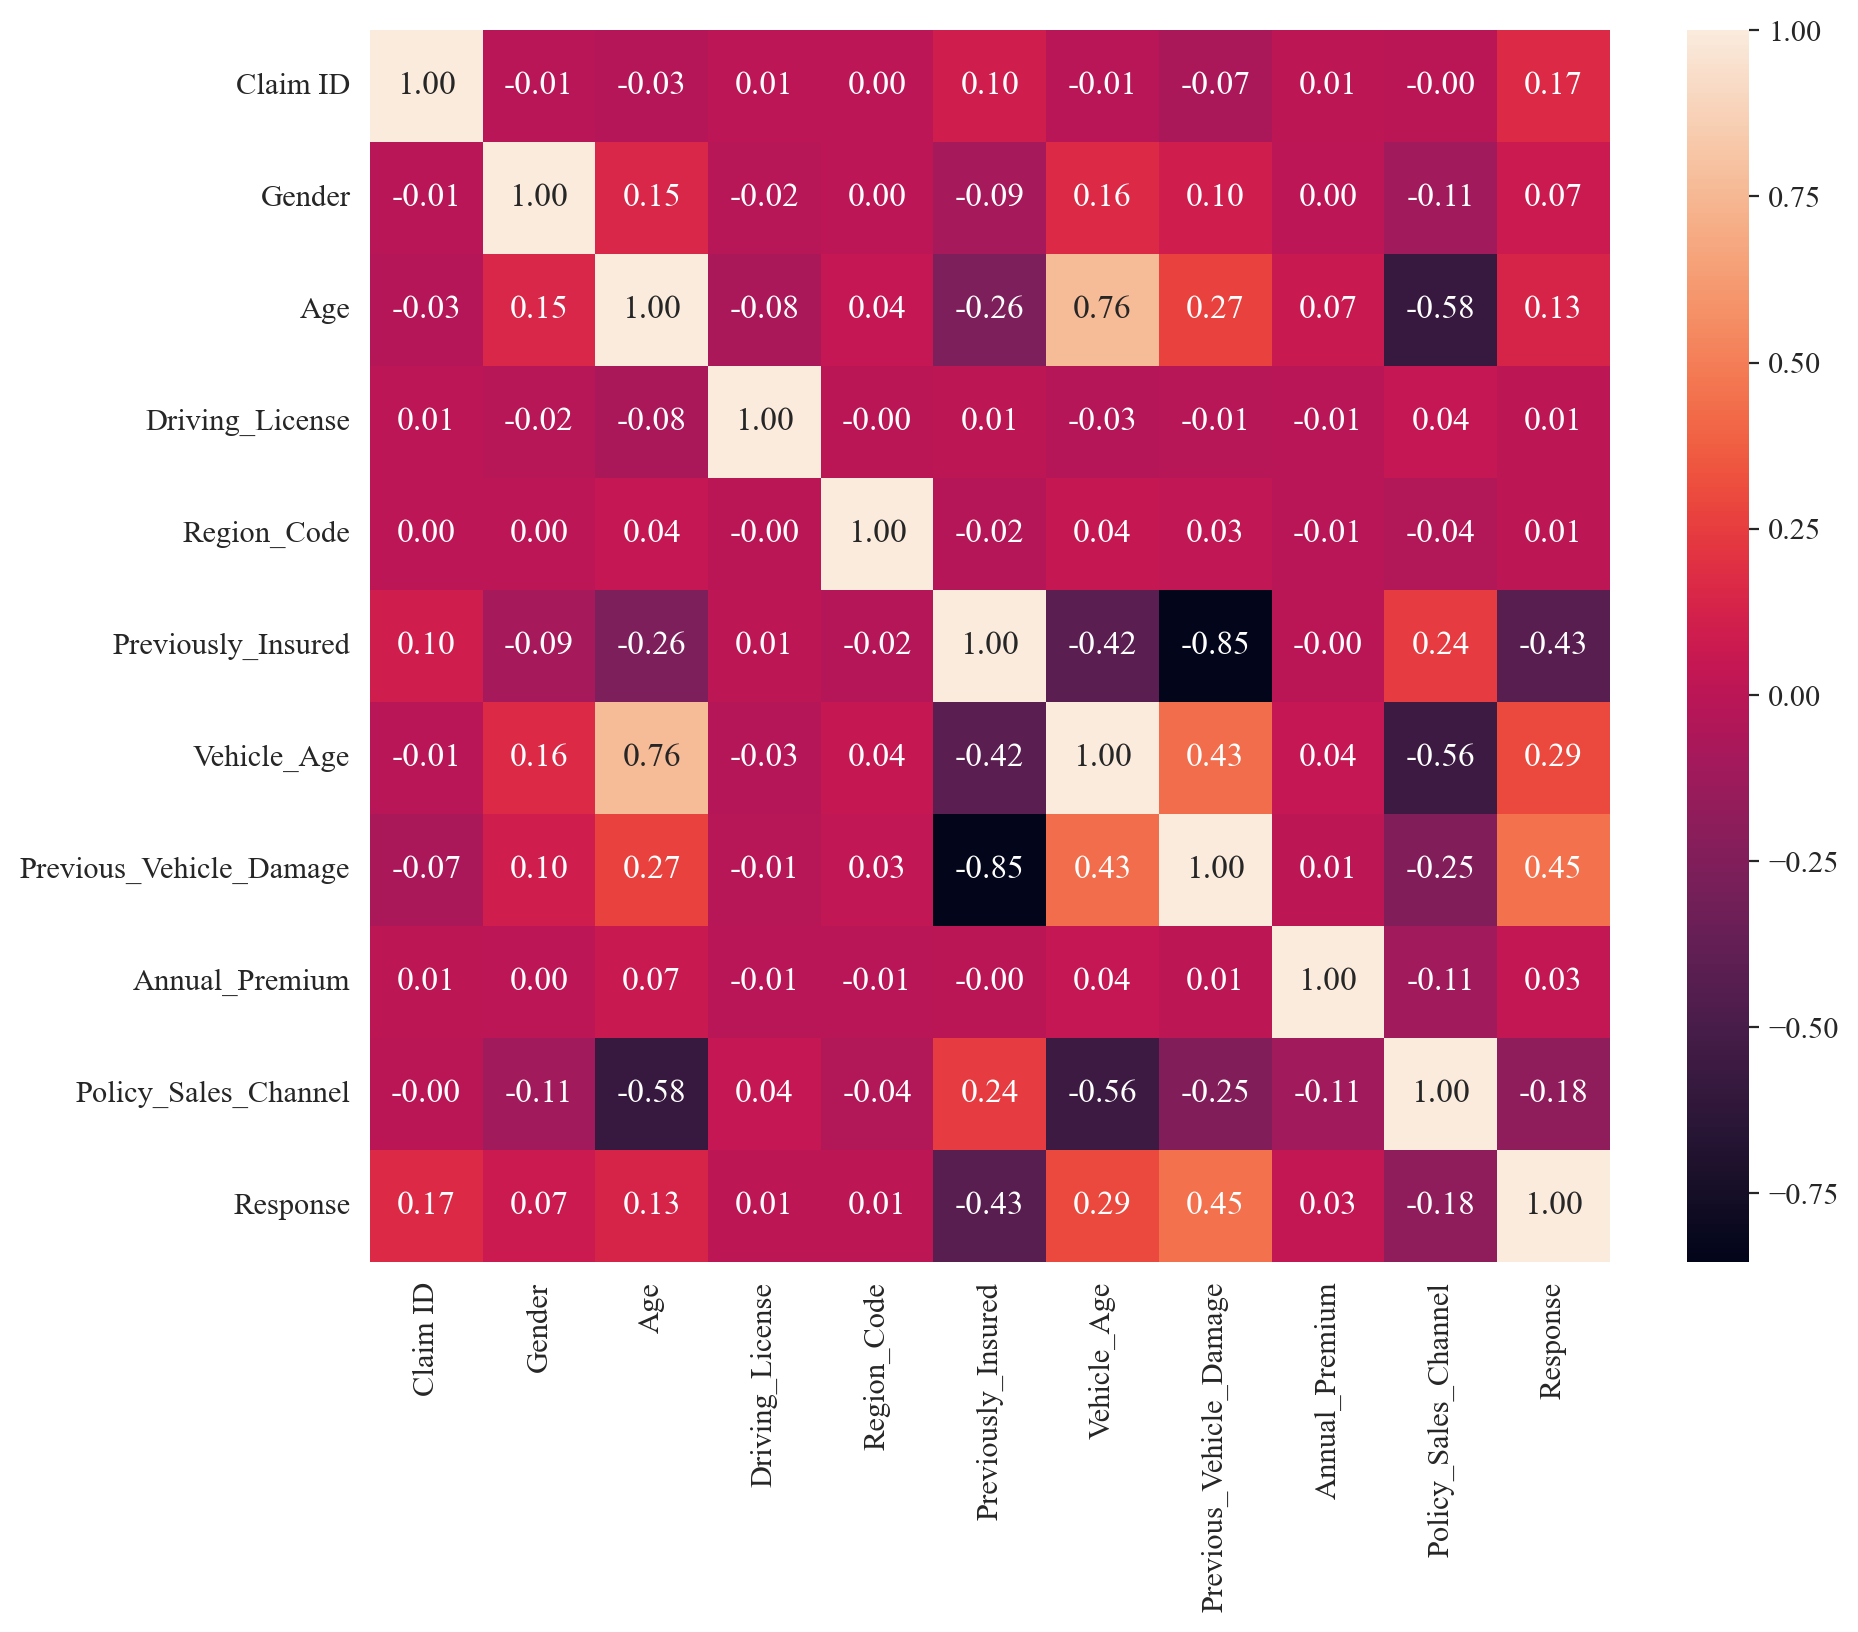

In [9]:
plt.figure(figsize=(10,8), dpi=200)
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

#### 3.2. Numerical Features

##### 3.2.1. Handle Outliers

Why Handle Outliers?
- Skewed Distribution: The Annual_Premium feature may have a right-skewed distribution with extreme high values (outliers).
- Impact on Scaling and Modeling: Outliers can affect the mean and standard deviation, impacting algorithms like Logistic Regression that assume normally distributed features.
- Improved Model Performance: Handling outliers can lead to better generalization on unseen data.

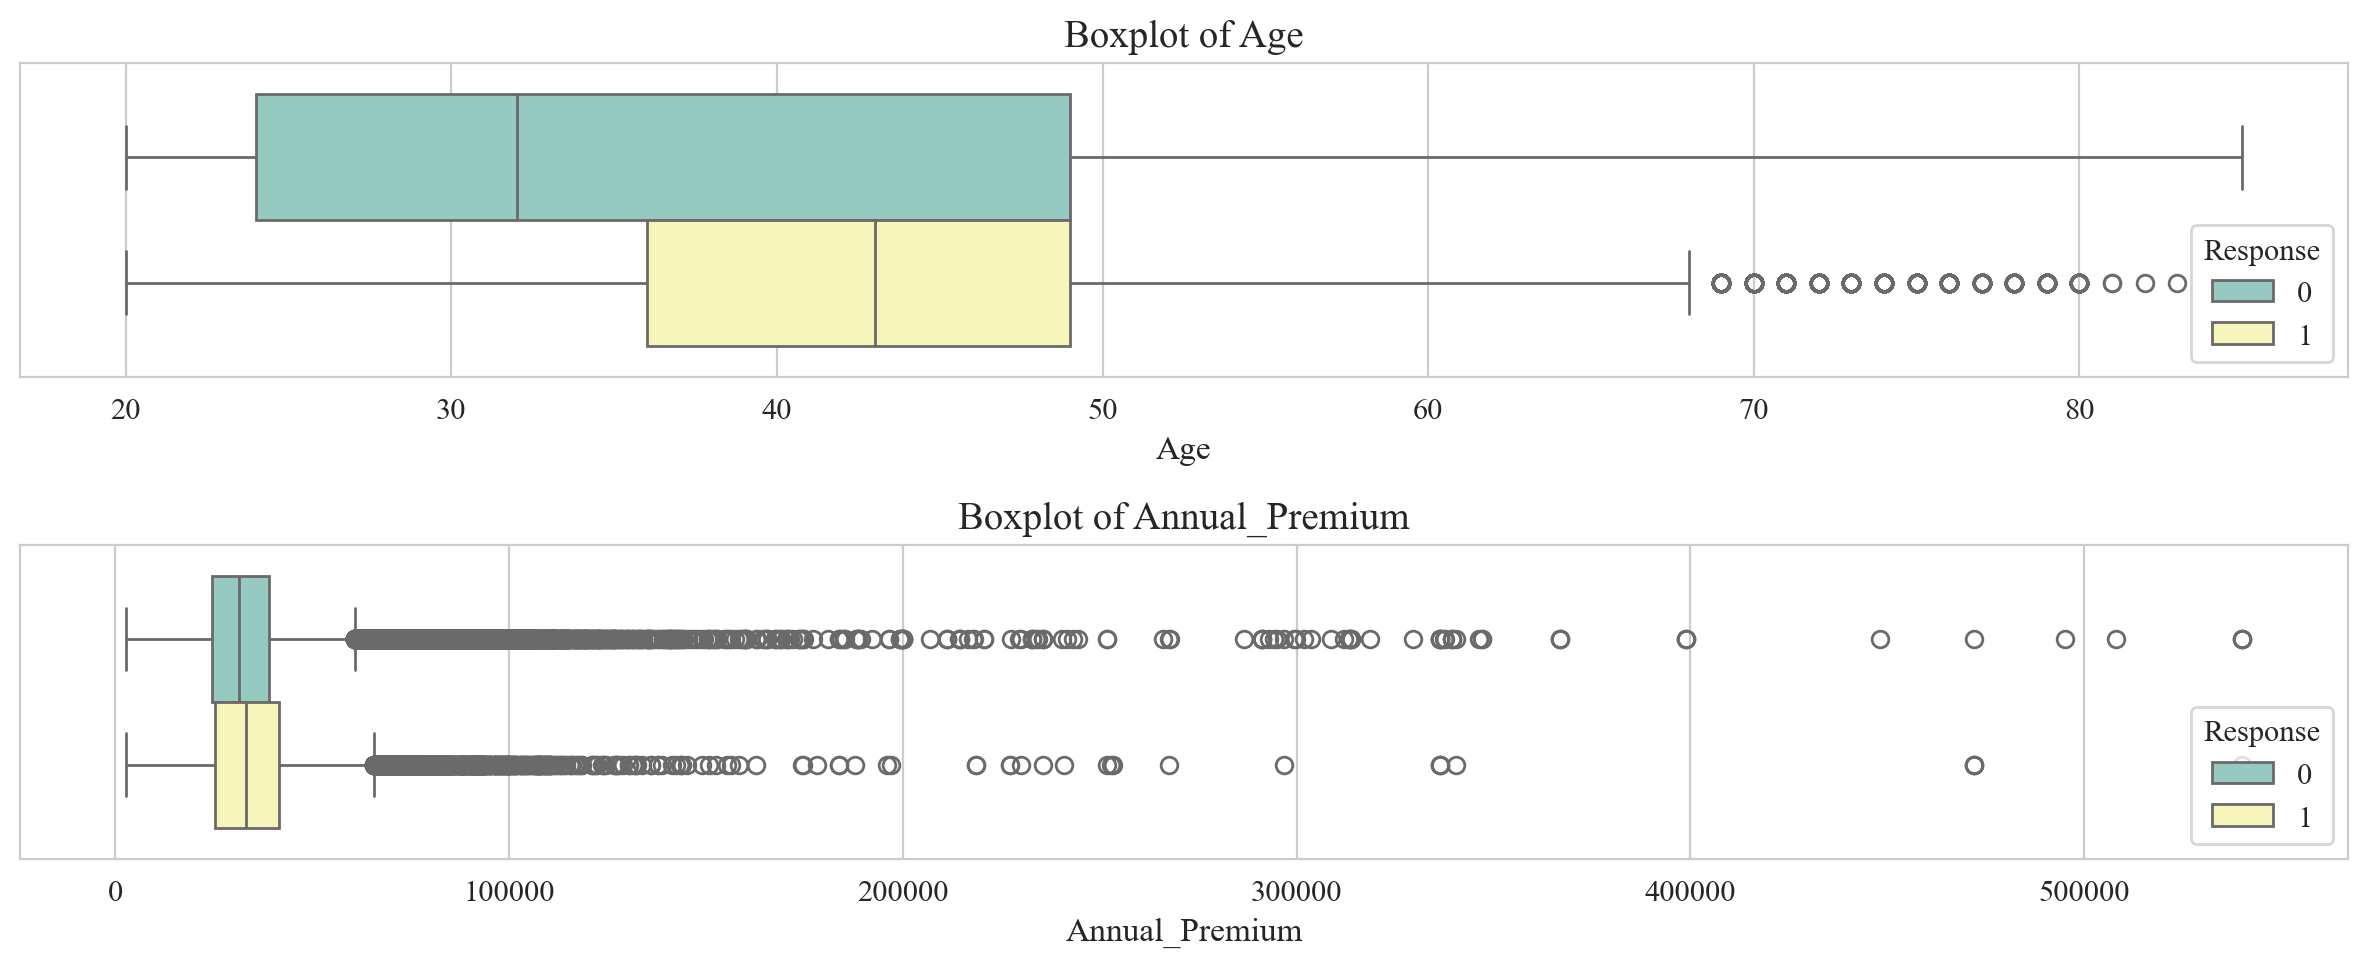

In [10]:
# Boxplot for detecting outliers in numerical features

def boxplot_numerical(df):
    plt.figure(figsize=(12, 5), dpi=200)
    for i, col in enumerate(['Age', 'Annual_Premium']):
        plt.subplot(2, 1, i+1)
        sns.boxplot(x=col, hue='Response', data=df, orient='h', palette='Set3')
        plt.title(f'Boxplot of {col}')
        # plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

boxplot_numerical(df)

Outlier handling strategies:
- `None`
    - Keep outliers
- `cap` (Winsorization)
    - Replace outliers beyond a certain percentile with the value at that percentile.
    - Pros: Retains all data points. Reduces the effect of extreme values.
    - Cons: May distort genuine high-value data.
- `remove`
    - Exclude data points outside the acceptable range.
    - Pros: Eliminates extreme values that may be errors.
    - Cons: Reduces the dataset size. Potentially loses important information.
<!-- - Transformation (not used)
    - Apply a logarithmic transformation to reduce skewness.
    - Pros: Reduces skewness. Preserves relationships between data points.
    - Cons: Interpretation of transformed data can be less intuitive. -->

For `cap` or `remove` strategies, we may dentify outliers using either `IQR` (Interquartile Range) or `percentile` Methods.

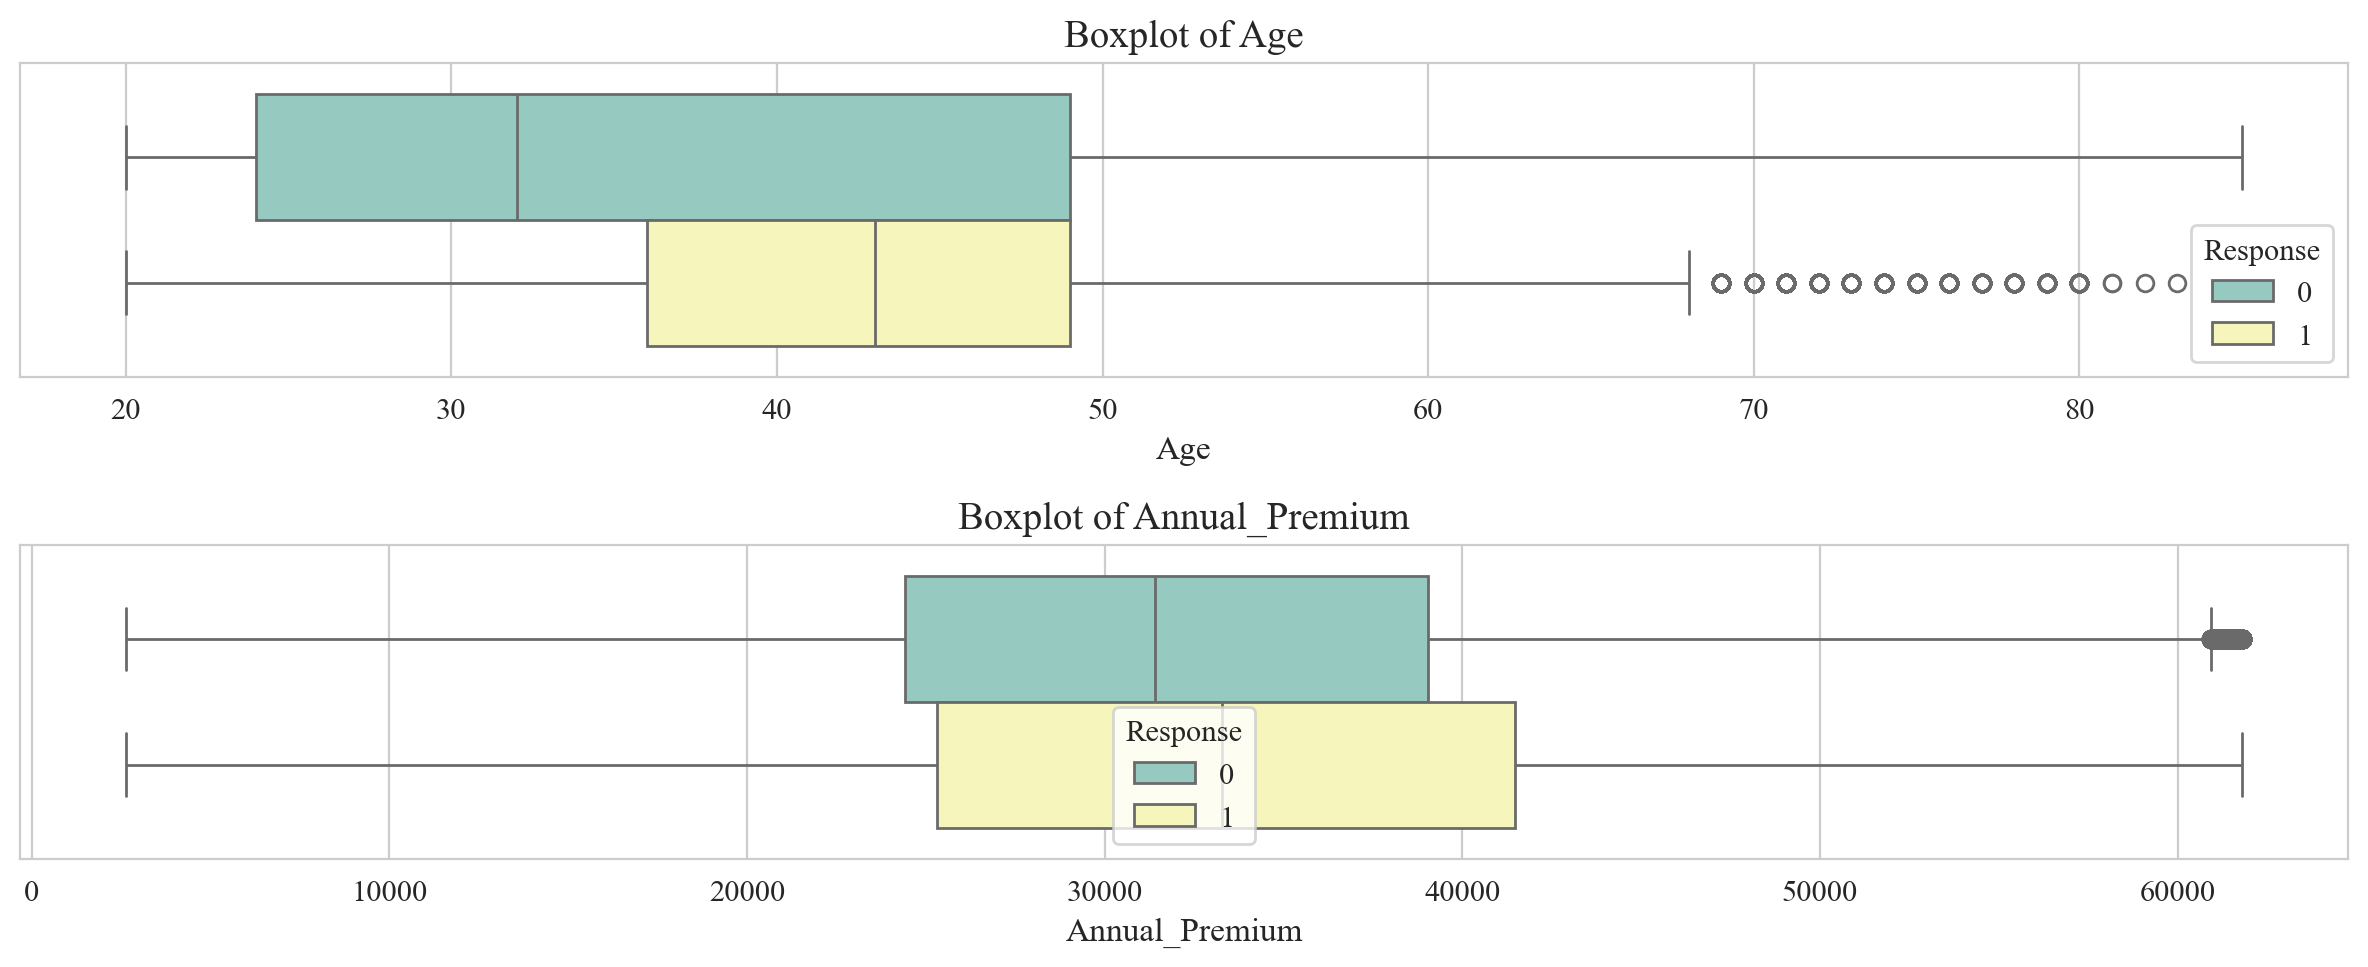

In [11]:
from data_util import _handle_outliers

df = _handle_outliers(df, 'Annual_Premium', strategy='cap', boundary_method='IQR')

boxplot_numerical(df)

##### 3.2.2. Feature Scaling (Normalization)

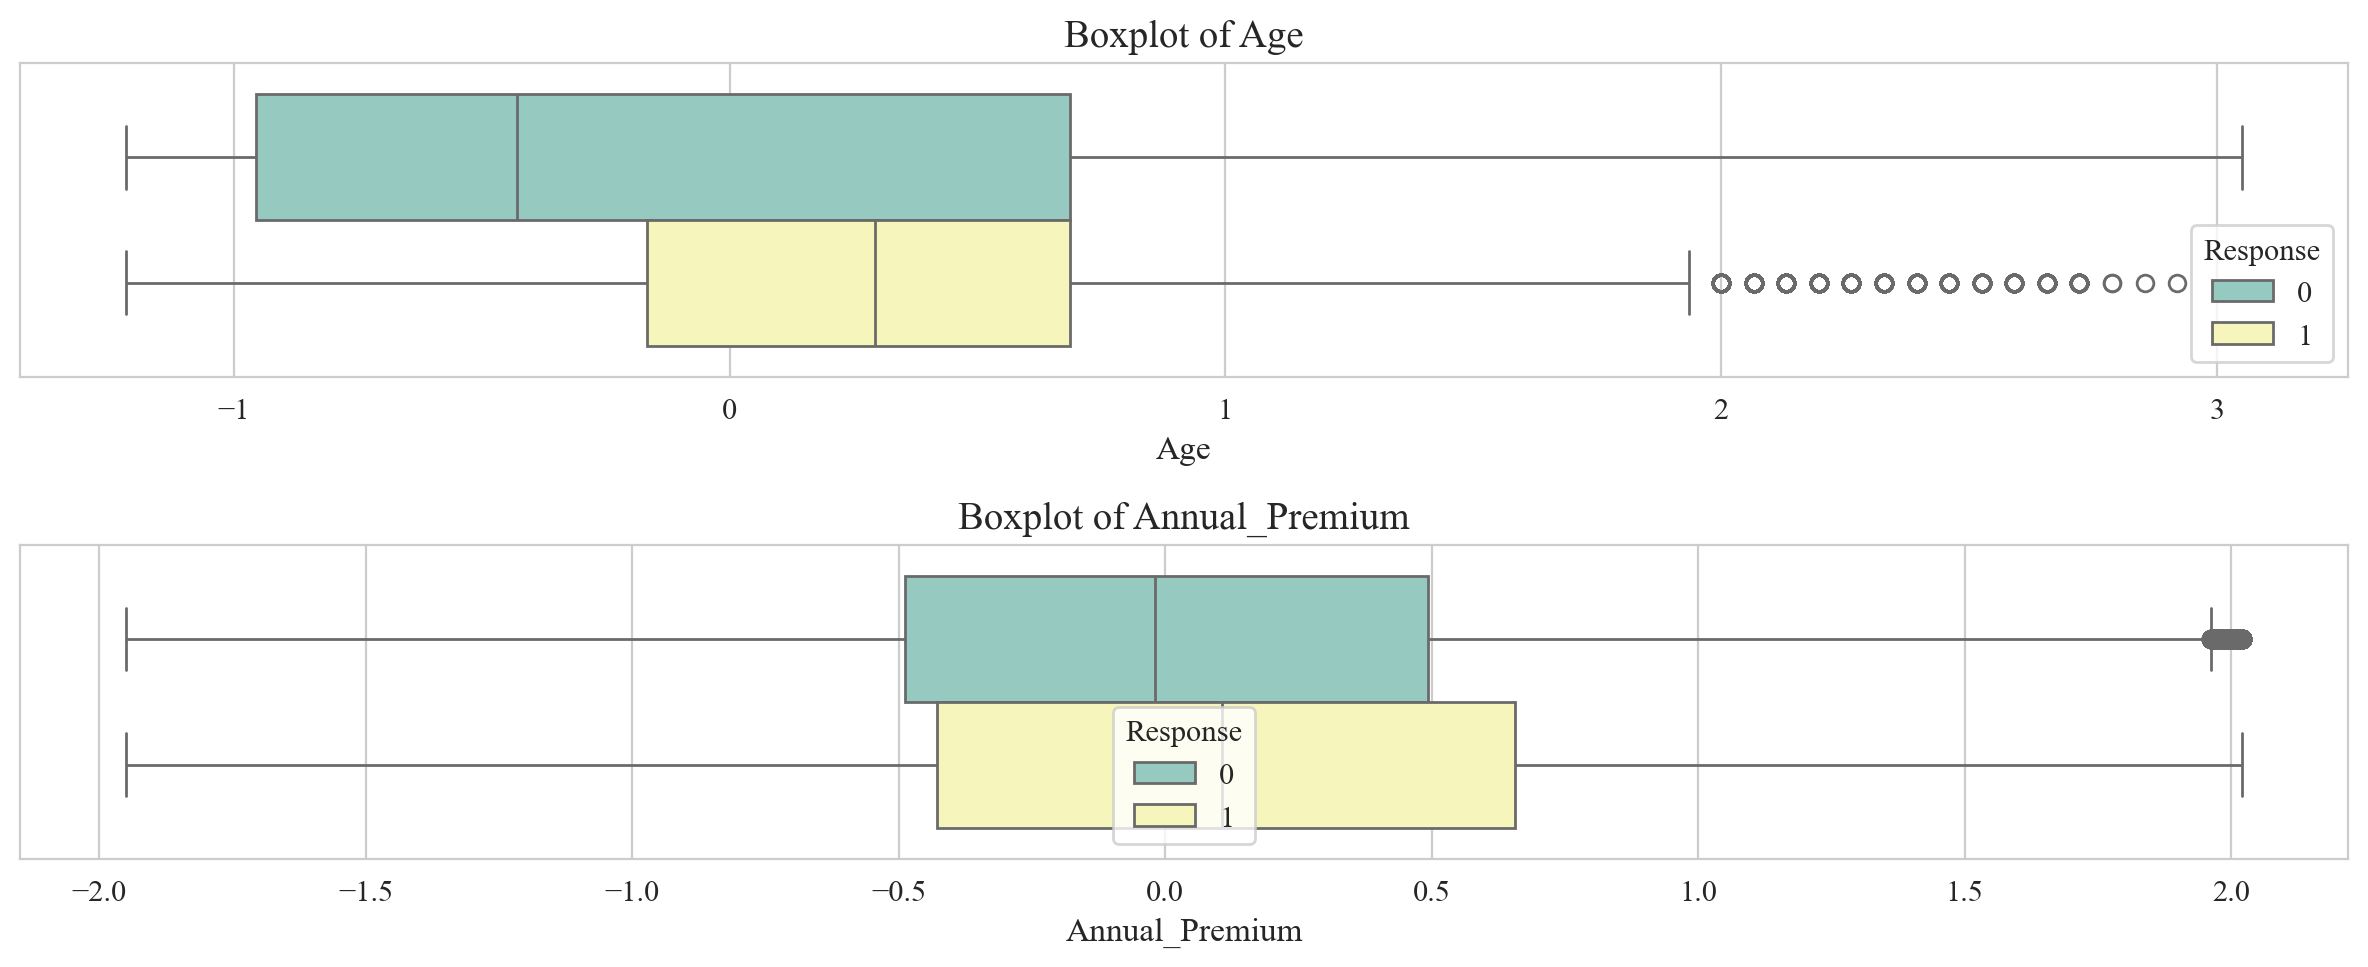

In [12]:
from data_util import _scale_numericals

df = _scale_numericals(df)

boxplot_numerical(df)

#### 3.3. Handling Class Imbalance

Data imbalance handling strategies:
- `None` or no imbalance handling
- Using the models' internal `class_weight` for prioritizing the minority (i.e. positive) class.
- Applying `SMOTE` or `ADASYN` methods for upsampling of the minority class.

In [13]:
X = df.drop('Response', axis=1)
y = df['Response']

- Original imbalance ratio (`None`)

In [14]:
def imbalance_info(X, y):
    print(f"X: {X.shape}, y: {y.shape}")
    
    counts = y.value_counts()  # normalize=True)
    imbalance_ratio = counts[0] / counts[1]
    print(counts)
    print(f"\nImbalance ratio: {imbalance_ratio:.2f}")

imbalance_info(X, y)

X: (382154, 10), y: (382154,)
Response
0    319553
1     62601
Name: count, dtype: int64

Imbalance ratio: 5.10


- Imbalance ratio after upsampling (`SMOTE`)

In [15]:
from data_util import _handle_class_imbalance

upsampled_X, upsampled_y = _handle_class_imbalance(X, y, strategy='SMOTE')

imbalance_info(upsampled_X, upsampled_y)

/Users/saeed/projects/claim_prediction/.venv/lib/python3.11/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


X: (639106, 10), y: (639106,)
Response
0    319553
1    319553
Name: count, dtype: int64

Imbalance ratio: 1.00


### 4. Splitting the Dataset

- Original distribution (`None`)

In [16]:
from data_util import _train_test_split

data_splits = _train_test_split(X, y)

for split, (X_split, y_split) in data_splits.items():
    print(f"{split}: X: {X_split.shape}, y: {y_split.shape}")

train: X: (305724, 10), y: (305724,)
validation: X: (38215, 10), y: (38215,)
test: X: (38215, 10), y: (38215,)


- With upsampling (`SMOTE`)

In [17]:
upsampled_data_splits = _train_test_split(upsampled_X, upsampled_y)

for split, (X_split, y_split) in upsampled_data_splits.items():
    print(f"{split}: X: {X_split.shape}, y: {y_split.shape}")

train: X: (511286, 10), y: (511286,)
validation: X: (63910, 10), y: (63910,)
test: X: (63910, 10), y: (63910,)
